## <b><font color='orange'> 1. Importing Data to Python </b>

In [1]:
# Import library pengolahan struktur data
import pandas as pd

# Import library pengolahan angka
import numpy as np

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Buat fungsi untuk mengimpor dataset
def ImportData(data_file):
    """
    Fungsi untuk import data & hapus duplikat
    :param data_file: <string> nama file input (format .data)
    :return heart_df: <pandas> sample data
    """
    # Definisikan nama kolom sesuai dengan dokumentasi dataset
    column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    # baca data
    heart_df = pd.read_csv(data_file, names=column_names)

    # cetak bentuk data
    print('Data asli:',heart_df.shape, '-(#Observasi, #kolom)')
    print('Jumlah baris',heart_df.shape[0], 'dan jumlah kolom',heart_df.shape[1])

    # Cek data duplikat
    duplicate_status = heart_df.duplicated(keep='first')

    if duplicate_status.sum() == 0:
        print('Tidak ada data duplikat')
    else:
        heart_df = heart_df.drop_duplicates()
        print('Data setelah di-drop :', heart_df.shape, '-(#observasi, #kolom)')

    return heart_df

# (data_file) adalah argumen
# Argumen adalah sebuah variable
# Jika fungsi tersebut diberi argumen data_file = "processed.cleveland.data",
# maka semua variable 'data_file' didalam fungsi akan berubah menjadi 'processed.cleveland.data'

In [3]:
# Input argumen
data_file = 'processed.cleveland.data'

# Panggil fungsi
heart_df = ImportData(data_file)

Data asli: (303, 14) -(#Observasi, #kolom)
Jumlah baris 303 dan jumlah kolom 14
Tidak ada data duplikat


In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Cek Banyak Observasi**

In [5]:
heart_df.shape

# Output --> (Jumlah  observasi, jumlah kolom/fitur)

(303, 14)

In [6]:
# Cek Jumlah nilai dan nilai unik pada setip kolom
summary_dict = {}
for i in list(heart_df.columns):
    summary_dict[i] = {
        'Jumlah Nilai': heart_df[i].value_counts().shape[0],
        'Nilai Unik': heart_df[i].unique()
    }
summary_df = pd.DataFrame(summary_dict).T

summary_df

,Jumlah Nilai,Nilai Unik
age,41,"[63.0, 67.0, 37.0, 41.0, 56.0, 62.0, 57.0, 53...."
sex,2,"[1.0, 0.0]"
cp,4,"[1.0, 4.0, 3.0, 2.0]"
trestbps,50,"[145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150..."
chol,152,"[233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268..."
fbs,2,"[1.0, 0.0]"
restecg,3,"[2.0, 0.0, 1.0]"
thalach,91,"[150.0, 108.0, 129.0, 187.0, 172.0, 178.0, 160..."
exang,2,"[0.0, 1.0]"
oldpeak,40,"[2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, ..."


>Terdapat nilai **'?'** pada kolom `ca` dan `thal`. Kita perlu merubah nilai tersebut menjadi NA/NaN

In [7]:
print('Jumlah nilai "?" pada kolom ca   :', (heart_df['ca'] == '?').sum())
print('Jumlah nilai "?" pada kolom thal :', (heart_df['thal'] == '?').sum())

Jumlah nilai "?" pada kolom ca   : 4
Jumlah nilai "?" pada kolom thal : 2


In [8]:
# Lihat semua baris yang mengandung nilai '?'
heart_df[heart_df.isin(['?']).any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
# Penganganan missing value
def handle_missing_value(data):
    """
    Fungsi untuk menangani missing value yang ditandai dengan '?'
    param df: <pandas dataframe> data input
    return df: <pandas dataframe> data dengan missing value yang sudah diganti
    """
    # Hapus baris dengan nilai'?'
    # data = data[data != '?'].dropna()

    # Ganti '?' dengan NaN
    data.replace('?', np.NaN, inplace=True)

    # Tampilkan jumlah missing value per kolom
    print('Jumlah missing value setelah dihapus:\n', data.isnull().sum())

    return data

In [10]:
# Panggil fungsi untuk menangai missing value
heart_df = handle_missing_value(heart_df)

Jumlah missing value setelah dihapus:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [11]:
print('Nilai unik kolom ca   :', heart_df['ca'].unique())
print('Nilai unik kolom thal :', heart_df['thal'].unique())

Nilai unik kolom ca   : ['0.0' '3.0' '2.0' '1.0' nan]
Nilai unik kolom thal : ['6.0' '3.0' '7.0' nan]


In [12]:
# Lihat semua baris yang mempunyai nilai NaN
heart_df[heart_df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


**Sanity Check**
- Selalu periksa ulang jumlah observasi

In [13]:
heart_df.shape

(303, 14)

## <b><font color='orange'> 2. Data Preprocessing:</font></b>
---
* Input-Output Split, Train-Test Split
* Processing Categorical
* Imputation, Normalization, Drop Duplicates

**Input-Output Split**

- Fitur `y` adalah output variabel dari target
- yang lainnya menjadi input

Buat output data

In [14]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
# Buat data yang berisikan data target
# Pilih data dengan nama kolom 'target' sebagai output data
output_data = heart_df['target']

output_data.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

**Buat data input**

- DATA = INPUT + OUTPUT
- DATA - OUTPUT = INPUT
- Jadi kalau dari data, kita drop VARIABLE OUTPUT, maka tersisa hanya variabel INPUT.

In [16]:
# def extractInputOutput(data, output_column_name, column_to_drop=None):
def extractInputOutput(data, output_column_name):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :param column_to_drop: daftar nama kolom yang ingin dihapus sebelum memisahkan
    :return input_data: <pandas dataframe> data input, <pandas series> data output
    """
    # drop data yang tidak diperlukan jika ada
    # if column_to_drop:
    #     data = data.drop(columns=column_to_drop)

    # pisahkan data output
    output_data = data[output_column_name]
    
    # drop kolom output dari data untuk mendapatkan input_data
    input_data = data.drop(columns=output_column_name, axis=1)

    return input_data, output_data

# (data, output_column_name) adalah argumen
# Argumen adalah sebuah variable
# Jika fungsi tsb diberi argumen data = heart_df
# maka semua variable 'data' didalam fungsi akan berubah menjadi heart_data

In [17]:
# input_data, output_data = extractInputOutput(heart_df, 'target')
x, y = extractInputOutput(heart_df, output_column_name='target')

In [18]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [19]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: target, dtype: int64

### **Train-Test Split**
- **Kenapa?**
    - Karena tidak ingin overfit data training
    - Test data akan menjadi future data
    - Kita akan melatih model ML di data training dengan CV (Cross Validation)
    - Selanjutnya melakukan evaluasi di data testing

**Train Test Split Function**
1. `X` adalah input
2. `y` adalah output (target)
3. `test_size` adalah seberapa besar proporsi data test dari keseluruhan data. Contoh `test_size = 0.2` artinya data test akan berisi 20% data.
4. `random_state` adalah kunci untuk random. Harus di-setting sama. Misal `random_state = 42`.
5. Output:
   - `x_train` = input dari data training
   - `x_test` = input dari data testing
   - `y_train` = output dari data training
   - `y_test` = output dari data testing
6. Urutan outputnya: `x_train, x_test, y_train, y_test`. Tidak boleh terbalik

> Readmore: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
# Import train-test splitting library dari sklearn
from sklearn.model_selection import train_test_split

# Train Test Split
# Test size 0.20 atau 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [21]:
# Sanity chect hasil splitting
print('Bentuk x_train', x_train.shape)
print('Bentuk x_test ', x_test.shape)
print('Bentuk y_train', y_train.shape)
print('Bentuk y_test ',y_test.shape)

Bentuk x_train (242, 13)
Bentuk x_test  (61, 13)
Bentuk y_train (242,)
Bentuk y_test  (61,)


In [22]:
# Ratio data train
x_test.shape[0] / x.shape[0]

# Hasil 0.20 --> artinya sudah sesuai denga test_size

0.20132013201320131

**Congrats kita sudah punya data train & test**

### **Data Imputation**
- Proses pengisian data yang kosong (NaN)
- Ada 2 hal yang perlu diperhatikan:
    - Numerical Imputation
    - Categorical Imputation

**Cek data yang kosong dari variable input**

In [23]:
# Cek nilai NaN pada data input
x_train.isna().any()

# False --> tidak ada nilai NaN
# True --> ada nilai NaN

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal         True
dtype: bool

In [24]:
# Cek nilai NaN pada data output
y_train.isna().any()

# False --> Tidak ada nilai NaN

False

**Bedakan antara data categorical dengan numerical**

**Data Categorical**
- sex
- cp
- fbs
- restecg
- exang
- slope
- thal

Sisanya adalah numerical

In [25]:
# Lihat nama kolom data train
x_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [26]:
# Buat kolom numerical dan categorical
categorical_column = ['sex','cp','fbs','restecg','exang','slope','thal']

numerical_column = ['age','trestbps','chol','thalach','oldpeak']

In [27]:
# Lihat hasil pengkategorian
print(categorical_column)
print(numerical_column)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [28]:
# Seleksi dataframe x_train_categorical dan x_train_numerical
x_train_categorical = x_train[categorical_column]

x_train_numerical = x_train[numerical_column]

**Cek apakah ada data numerik yang kosong**

In [29]:
# Cek nilai kosongpada x_train numerik
x_train_numerical.isnull().any()

# Tidak ada variable numerik yang kosong

age         False
trestbps    False
chol        False
thalach     False
oldpeak     False
dtype: bool

**Cek apakah ada data kategorik yang kosong**

In [30]:
# Cek nilai missing value pada x_train_kategorik
x_train_categorical.isnull().sum()

# Variable kolom thal terdapat missing value

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       2
dtype: int64

**Categorical Imputation**

In [31]:
def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :parameter data: <pandas dataframe> sample data input
    :parameter categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data ketegorilal
    """
    # Seleksi data
    categorical_data = data[categorical_column]

    # Lakukan Imputasi
    categorical_data = categorical_data.fillna(value = "KOSONG")

    return categorical_data

In [32]:
x_train_categorical = categoricalImputation(data=x_train, categorical_column=categorical_column)

In [33]:
x_train_categorical[x_train_categorical.isin(['KOSONG']).any(axis=1)]

,sex,cp,fbs,restecg,exang,slope,thal
266,1.0,4.0,1.0,0.0,1.0,2.0,KOSONG
87,0.0,3.0,0.0,2.0,0.0,1.0,KOSONG


In [34]:
x_train_categorical.isnull().sum()

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64

In [35]:
# Cek data type dari variable kategorik
x_train_categorical.dtypes

sex        float64
cp         float64
fbs        float64
restecg    float64
exang      float64
slope      float64
thal        object
dtype: object

**Preprocessing Categorical Variables**
- Kita tidak bisa memasukkan data categorical jika tidak diubah menjadi numerical
- Solusi --> One Hot Encoding (OHE)

In [36]:
def extractCategorical(data, categorical_column):
    """
    Fungsi untuk ekstrak data kategorikal dengan One Hot Encoding (OHE)
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list kolom kategorik
    :param categorical_ohe: <pandas dataframe> data sample dengan OHE
    :return result_data: <pandas dataframe> hasil penggabungan data sample dengan data ketegorik OHE
    """
    # Pastikan kolom kategorikal bertipe 'category' atau 'object'
    data[categorical_column] = data[categorical_column].astype('category')

    # Lakukan One-Hot Encoding pada kolom kategorikal
    # categorical_ohe = pd.get_dummies(data[categorical_column])
    categorical_ohe = pd.get_dummies(data[categorical_column], columns=categorical_column)
    
    # Gabungkan hasil OHE dengan kolom lainnya (jika ada)
    # result_data = pd.concat([data.drop(columns=categorical_column), categorical_ohe], axis=1)
    
    return categorical_ohe

In [37]:
# Panggil fungsi untuk melakukan encoding
x_train_categorical_ohe = extractCategorical(data=x_train_categorical, categorical_column=categorical_column)

In [38]:
x_train_categorical_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 132 to 102
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sex_0.0      242 non-null    bool 
 1   sex_1.0      242 non-null    bool 
 2   cp_1.0       242 non-null    bool 
 3   cp_2.0       242 non-null    bool 
 4   cp_3.0       242 non-null    bool 
 5   cp_4.0       242 non-null    bool 
 6   fbs_0.0      242 non-null    bool 
 7   fbs_1.0      242 non-null    bool 
 8   restecg_0.0  242 non-null    bool 
 9   restecg_1.0  242 non-null    bool 
 10  restecg_2.0  242 non-null    bool 
 11  exang_0.0    242 non-null    bool 
 12  exang_1.0    242 non-null    bool 
 13  slope_1.0    242 non-null    bool 
 14  slope_2.0    242 non-null    bool 
 15  slope_3.0    242 non-null    bool 
 16  thal_3.0     242 non-null    bool 
 17  thal_6.0     242 non-null    bool 
 18  thal_7.0     242 non-null    bool 
 19  thal_KOSONG  242 non-null    bool 
dtypes: bool(20)
m

In [39]:
# Simpan kolom OHE untuk diimplementasikan dalam testing data
# Agar shape nya konsisten
ohe_columns = x_train_categorical_ohe.columns

In [40]:
ohe_columns

Index(['sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0',
       'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0',
       'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'thal_3.0',
       'thal_6.0', 'thal_7.0', 'thal_KOSONG'],
      dtype='object')

### Join data Numerical dan Categorical
- Data numerik & kategorik harus digabungkan kembali
- Penggabungan dengan `pd.concat`

In [41]:
# Lakukan penggabungan data numerik dan data kategorik yang sudah di encoded
x_train_concat = pd.concat([x_train_numerical, x_train_categorical_ohe],axis=1)

In [42]:
# Cek hasil penggabungan
x_train_concat.head()

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,thal_KOSONG
132,29.0,130.0,204.0,202.0,0.0,False,True,False,True,False,...,True,True,False,True,False,False,True,False,False,False
202,57.0,150.0,126.0,173.0,0.2,False,True,False,False,True,...,False,True,False,True,False,False,False,False,True,False
196,69.0,160.0,234.0,131.0,0.1,False,True,True,False,False,...,True,True,False,False,True,False,True,False,False,False
75,65.0,160.0,360.0,151.0,0.8,True,False,False,False,True,...,True,True,False,True,False,False,True,False,False,False
176,52.0,108.0,233.0,147.0,0.1,False,True,False,False,False,...,False,True,False,True,False,False,False,False,True,False


In [43]:
# Cek nilai kosong hasil penggabungan
x_train_concat.isnull().any().sum()

0

>Tidak ada missing value pada penggabungan data numerik dan data kategorik

In [44]:
x_train_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
age,242.0,54.805785,9.110177,29.0,48.0,56.00,61.75,77.0
trestbps,242.0,132.289256,18.208993,94.0,120.0,130.00,140.00,200.0
chol,242.0,245.619835,48.262982,126.0,212.0,240.00,272.50,417.0
thalach,242.0,150.099174,22.470970,71.0,136.0,152.50,166.75,202.0
oldpeak,242.0,1.035537,1.187861,0.0,0.0,0.75,1.60,6.2


In [45]:
# x_train.isnull().any()

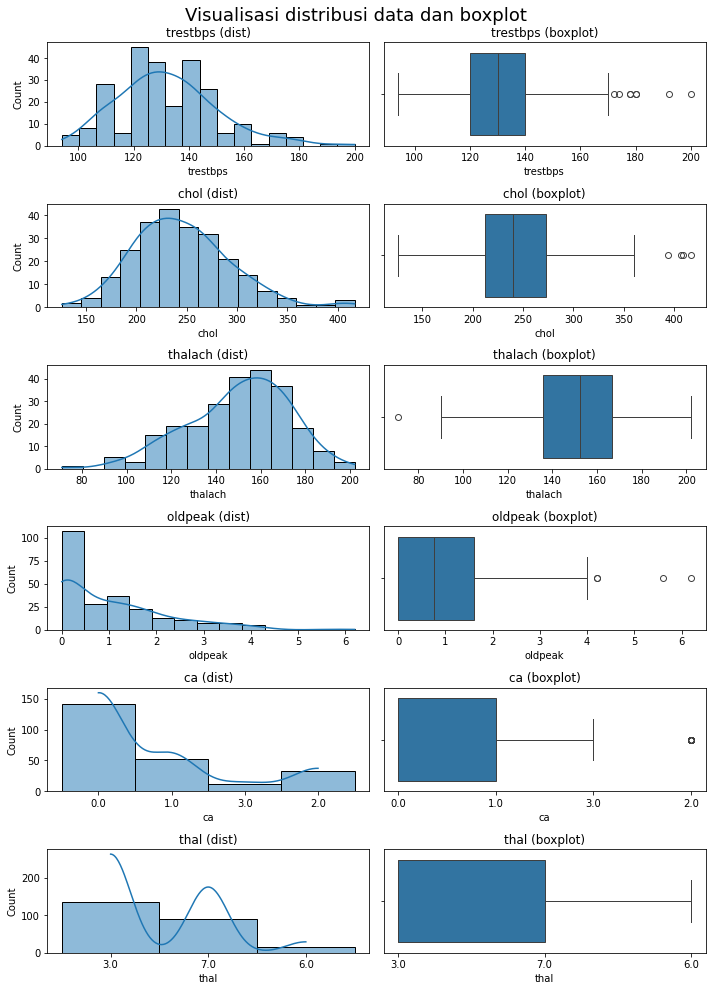

In [46]:
# Visualisasi distribusi data input
# Import library untuk memvisualisasi

import matplotlib.pyplot as plt
import seaborn as sns

# Buat kolom- kolom tertentu untuk divisualisasikan
columns = ['trestbps','chol','thalach','oldpeak', 'ca', 'thal']

a = len(columns) # jumlah baris
b = 2 # jumlah kolom
c = 1 # inisial plot counter

fig = plt.figure(figsize=(10,14))
plt.suptitle("Visualisasi distribusi data dan boxplot", fontsize=18)

# Iterasi melalui kolom-kolom dan membuat boxplot
for i in columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i,))
    plt.xlabel(i)
    sns.histplot(data=x_train, x=i,kde=True)
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (boxplot)'.format(i,))
    plt.xlabel(i)
    sns.boxplot(data=x_train, x=i)
    c = c + 1
   
plt.tight_layout()
plt.show()

>Insight / Wawasan
1. trestbps (Resting Blood Pressure):
    - Mean: 131.69
    - Std Dev: 17.60
    - Min: 94.0
    - Max: 200.0
    - Nilai maksimum 200.0 terlihat cukup jauh dari rata-rata 131.69, menunjukkan adanya kemungkinan outlier di data tekanan darah ini.

2. chol (Serum Cholestoral):
    - Mean: 246.69
    - Std Dev: 51.78
    - Min: 126.0
    - Max: 564.0
    - Cholesterol maksimal 564.0 sangat jauh dari mean 246.69, ini juga mengindikasikan adanya outlier.

3. thalach (Maximum Heart Rate Achieved):
    - Mean: 149.61
    - Std Dev: 22.88
    - Min: 71.0
    - Max: 202.0
    - Nilai minimum 71.0 jauh lebih rendah dari nilai mean dan Q1, yang mengindikasikan kemungkinan outlier di sisi bawah.

4. oldpeak (ST Depression Induced by Exercise):
    - Mean: 1.04
    - Std Dev: 1.16
    - Min: 0.0
    - Max: 6.2
    - Nilai oldpeak maksimal 6.2 juga cukup jauh dari rata-rata dan bahkan Q3 (1.6), yang mungkin menunjukkan adanya outlier.

5. ca (Number of Major Vessels Colored by Fluoroscopy):
    - Mean: 0.66
    - Std Dev: 0.93
    - Min: 0.0
    - Max: 3.0
    - Walaupun distribusi ca terlihat lebih wajar, standar deviasi yang besar menunjukkan bahwa ada variasi yang cukup tinggi, yang mungkin mengindikasikan beberapa nilai outlier.

6. thal (Thalassemia):
    - Mean: 4.72
    - Std Dev: 1.94
    - Min: 3.0
    - Max: 7.0
    - Nilai thal dengan standar deviasi yang cukup besar dan range dari 3.0 sampai 7.0 mengindikasikan adanya perbedaan signifikan dalam distribusi, dan kemungkinan adanya outliers di ujung nilai yang lebih tinggi.

>**Dari insight diatas kita bisa lihat ada beberapa outlier dalam semua fitur kategorik**

### Standardizing Variables
- Menyamakan skala dari variable input
- `fit` : imputer agar mengetahui mean dan standar deviasi dari setiap kolom
- `transform` : isi data dngan value yang sudah di normalisasi
- output dari transform berupa pandas dataframe
- normalize dikeluarkan karena akan digunakan pada data test


In [47]:
x_train_concat.isnull().any()

age            False
trestbps       False
chol           False
thalach        False
oldpeak        False
sex_0.0        False
sex_1.0        False
cp_1.0         False
cp_2.0         False
cp_3.0         False
cp_4.0         False
fbs_0.0        False
fbs_1.0        False
restecg_0.0    False
restecg_1.0    False
restecg_2.0    False
exang_0.0      False
exang_1.0      False
slope_1.0      False
slope_2.0      False
slope_3.0      False
thal_3.0       False
thal_6.0       False
thal_7.0       False
thal_KOSONG    False
dtype: bool

In [48]:
from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

data_columns = x_train_concat.columns
data_index = x_train_concat.index


scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train_concat)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_train_scaled.columns = data_columns
x_train_scaled.index = data_index
# x_train_scaled.shape

In [49]:
x_train_scaled.head()

,age,trestbps,chol,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,...,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,thal_KOSONG
132,-1.963636,0.0,-0.595041,1.609756,-0.46875,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.072727,1.0,-1.884298,0.666667,-0.34375,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0
196,0.945455,1.5,-0.099174,-0.699187,-0.40625,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75,0.654545,1.5,1.983471,-0.048780,0.03125,1.0,-1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
176,-0.290909,-1.1,-0.115702,-0.178862,-0.40625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0


## <b><font color='orange'> 3. Training Machine Learning:</font></b>
---
        - Kita harus mengalahkan benchmark

**Benchmark / Baseline**
- Baseline untuk evaluasi nanti
- Karena ini klarifikasi, bisa kita ambil dari proporsi kelas target yang terbesar

In [50]:
benchmark = y_train.value_counts(normalize=True)
benchmark

target
0    0.557851
1    0.177686
3    0.115702
2    0.111570
4    0.037190
Name: proportion, dtype: float64

### 1. Import Model
- Kita akan gunakan 3 model ML untuk klarifikasi:
    - K-nearest neighbor (K-NN)
    - Logistic Regression
    - Random Forest
    - Adaboost
    - SVC
    

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


### 2. Fitting Model, Cek Performa & Prediksi
- Cara fitting / training model mengikuti yang dokumentasi model

In [52]:
# Model Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(x_train_scaled, y_train) # Latih model menggunakan data yang sudah di-scalling

y_pred_logreg = logreg.predict(x_train_scaled)
print('Akurasi pada data training :',accuracy_score(y_train, y_pred_logreg))
print('Classification report      :\n',classification_report(y_train, y_pred_logreg))

Akurasi pada data training : 0.6570247933884298
Classification report      :
               precision    recall  f1-score   support

           0       0.78      0.92      0.85       135
           1       0.34      0.26      0.29        43
           2       0.38      0.33      0.35        27
           3       0.56      0.54      0.55        28
           4       0.00      0.00      0.00         9

    accuracy                           0.66       242
   macro avg       0.41      0.41      0.41       242
weighted avg       0.61      0.66      0.63       242



**Insight**

Logistic Regression:
- Akurasi: 65.7%
- Model ini memiliki akurasi yang moderat namun rendah dalam menangani kelas minoritas, seperti kelas 1 dan 4 yang memiliki precision dan recall yang rendah. Ini umum terjadi karena Logistic Regression adalah model linier yang bisa kesulitan menangani hubungan yang kompleks di dalam data.
- Kesimpulan: Logistic Regression tidak bekerja dengan baik pada dataset ini, terutama pada kelas yang kurang terwakili.

In [53]:
# Model K-nearst neighbor (KNN)
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

y_pred_knn = knn.predict(x_train_scaled)
print('Akurasi pada data training :',accuracy_score(y_train, y_pred_knn))
print('Classification report      :\n',classification_report(y_train, y_pred_knn))

Akurasi pada data training : 0.7024793388429752
Classification report      :
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       135
           1       0.52      0.56      0.54        43
           2       0.48      0.41      0.44        27
           3       0.50      0.21      0.30        28
           4       1.00      0.11      0.20         9

    accuracy                           0.70       242
   macro avg       0.66      0.45      0.47       242
weighted avg       0.69      0.70      0.67       242



**Insight**

K-Nearest Neighbors (KNN):
- Akurasi: 70.2%
- Model ini memberikan performa yang lebih baik dibandingkan Logistic Regression, terutama pada kelas 1 dan 2, namun kelas 3 dan 4 masih memiliki kinerja yang rendah. Ini disebabkan oleh sifat KNN yang bisa terpengaruh oleh distribusi data yang tidak seimbang.
- Kesimpulan: KNN bisa menangani dataset ini dengan lebih baik dari Logistic Regression, tapi masih sensitif terhadap outlier dan kelas yang tidak seimbang.

In [54]:
# Model Random Forest
random_forest = RandomForestClassifier(random_state=123)
random_forest.fit(x_train_scaled, y_train)

y_pred_rf = random_forest.predict(x_train_scaled)
print('Akurasi pada data training :',accuracy_score(y_train, y_pred_rf))
print('Classification report      :\n',classification_report(y_train, y_pred_rf))


Akurasi pada data training : 1.0
Classification report      :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00         9

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



**Insight**

Random Forest:

- Akurasi: 100%
- Model ini overfitting pada data training karena mencapai akurasi 100%, yang sangat jarang terjadi dalam model yang generalis. Ini bisa menjadi tanda bahwa model terlalu mempelajari detail kecil pada data training, dan mungkin akan mengalami penurunan performa pada data uji.
- Kesimpulan: Random Forest mempelajari data training dengan sangat baik, tetapi kemungkinan besar tidak akan generalisasi dengan baik pada data uji.

In [55]:
# Model AdaBosst
adaboost = AdaBoostClassifier(random_state=123)
adaboost.fit(x_train_scaled, y_train)

y_pred_ada = adaboost.predict(x_train_scaled)
print('Akurasi pada data training :',accuracy_score(y_train, y_pred_ada))
print('Classification report      :\n',classification_report(y_train, y_pred_ada))

Akurasi pada data training : 0.6652892561983471
Classification report      :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       135
           1       0.43      0.51      0.47        43
           2       0.38      0.30      0.33        27
           3       0.48      0.54      0.51        28
           4       0.86      0.67      0.75         9

    accuracy                           0.67       242
   macro avg       0.60      0.57      0.58       242
weighted avg       0.67      0.67      0.67       242



**Insight**

AdaBoost:

- Akurasi: 66.5%
- Performa serupa dengan Logistic Regression dan KNN, namun sedikit lebih baik dalam menangani kelas 1 dan 4. Model ini bekerja dengan baik untuk kelas mayoritas (kelas 0), namun kelas minoritas masih memiliki recall yang rendah, seperti pada kelas 2 dan 3.
- Kesimpulan: AdaBoost memiliki performa yang stabil, tetapi bisa lebih baik jika dilakukan balancing data atau feature engineering tambahan.

In [56]:
# Model Support Vector Classification
svc = SVC(kernel='rbf')
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_train_scaled)
print('Akurasi pada data training :',accuracy_score(y_train, y_pred_svc))
print('Classification report      :\n',classification_report(y_train, y_pred_svc))

Akurasi pada data training : 0.7520661157024794
Classification report      :
               precision    recall  f1-score   support

           0       0.77      0.99      0.86       135
           1       0.58      0.42      0.49        43
           2       0.87      0.48      0.62        27
           3       0.81      0.61      0.69        28
           4       0.00      0.00      0.00         9

    accuracy                           0.75       242
   macro avg       0.60      0.50      0.53       242
weighted avg       0.72      0.75      0.72       242



**Insight**

Support Vector Classification (SVC):

- Akurasi: 75.2%
- Model ini memiliki kinerja terbaik dari segi akurasi. Precision dan recall cukup baik untuk kelas mayoritas, namun kelas minoritas seperti kelas 4 memiliki precision dan recall yang sangat rendah. Hal ini mungkin disebabkan oleh distribusi kelas yang tidak seimbang.
- Kesimpulan: SVC memberikan hasil yang paling baik di antara model-model lain, namun masih membutuhkan perbaikan dalam hal penanganan kelas minoritas.

In [57]:
# # KNN Hyperparameter Tuning
# knn = KNeighborsClassifier()
# knn_params = {
#     'n_neighbors': [3, 5, 7, 9], # Jumlah tetangga yang dipertimbangkan
#     'weights': ['uniform', 'distance'], # Bobot untuk tetangga
#     'metric': ['euclidean', 'manhattan', 'minkowski'] # Jenis jarak
# }

# knn_grid = GridSearchCV(knn, param_grid=knn_params, cv=5, scoring='accuracy') # Atau gunakan RandomizedSearchCV
# knn_grid.fit(x_train_scaled, y_train)
# print('Best Params for KNN:', knn_grid.best_params_)
# print('Best KNN Accuracy:', knn_grid.best_score_)

# # Random Forest Hyperparameter Tuning
# random_forest = RandomForestClassifier(random_state=123)
# rf_params = {
#     'n_estimators': [100, 200, 300], # Jumlah trees
#     'max_depth': [None, 10, 20, 30], # Kedalaman tree
#     'min_samples_split': [2, 5, 10], # Minimum sampel untuk split
#     'min_samples_leaf': [1, 2, 4] # Minimum sampel di leaf node
# }

# rf_grid = GridSearchCV(random_forest, param_grid=rf_params, cv=5, scoring='accuracy') # Atau gunakan RandomizedSearchCV
# rf_grid.fit(x_train_scaled, y_train)
# print('Best Params for Random Forest:', rf_grid.best_params_)
# print('Best Random Forest Accuracy:', rf_grid.best_score_)

# # AdaBoost Hyperparameter Tuning
# adaboost = AdaBoostClassifier(random_state=123)
# adaboost_params = {
#     'n_estimators': [50, 100, 200], # Jumlah estimator
#     'learning_rate': [0.01, 0.1, 1, 10] # Kecepatan belajar
# }

# adaboost_grid = GridSearchCV(adaboost, param_grid=adaboost_params, cv=5, scoring='accuracy') # Atau gunakan RandomizedSearchCV
# adaboost_grid.fit(x_train_scaled, y_train)
# print('Best Params for AdaBoost:', adaboost_grid.best_params_)
# print('Best AdaBoost Accuracy:', adaboost_grid.best_score_)

# # SVC Hyperparameter Tuning
# svc = SVC()
# svc_params = {
#     'C': [0.1, 1, 10, 100], # Regularisasi
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # Kernel function
#     'gamma': ['scale', 'auto'] # Kernel coefficient
# }

# svc_grid = GridSearchCV(svc, param_grid=svc_params, cv=5, scoring='accuracy') # Atau gunakan RandomizedSearchCV
# svc_grid.fit(x_train_scaled, y_train)
# print('Best Params for SVC:', svc_grid.best_params_)
# print('Best SVC Accuracy:', svc_grid.best_score_)

### 3. Simpan model ke file pickle

In [58]:
import joblib

# Simpan model logreg ke dalam folder yang sama dengan notebook
# dengan nama logreg.pkl
joblib.dump(knn, 'knn.pkl')
joblib.dump(logreg, 'logreg.pkl')
joblib.dump(random_forest, 'rf.pkl')
joblib.dump(adaboost, 'ada.pkl')
joblib.dump(svc, 'svc.pkl')

['svc.pkl']

### 4. Test Prediction
1. Siapkan file test dataset
2. Lakukan preprocessing yang sama dengan yang dilakukan di train dataset
3. Gunakan `imputer_numerical` jika ada data yang kosong dan `standarizer` yang telah di fit di train dataset

In [59]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0
111,56.0,1.0,4.0,125.0,249.0,1.0,2.0,144.0,1.0,1.2,2.0,1.0,3.0
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,1.0,7.0
60,51.0,0.0,4.0,130.0,305.0,0.0,0.0,142.0,1.0,1.2,2.0,0.0,7.0


In [60]:
# Seleksi dataframe x_test_categorical dan x_test_numerical
x_test_numerical = x_test[numerical_column]
x_test_categorical = x_test[categorical_column]

In [61]:
x_test_categorical.isnull().any()

sex        False
cp         False
fbs        False
restecg    False
exang      False
slope      False
thal       False
dtype: bool

In [62]:
x_test_numerical.isnull().any()

age         False
trestbps    False
chol        False
thalach     False
oldpeak     False
dtype: bool

In [64]:
# Pastikan sudah melakukan one-hot encoding pada data kategorikal untuk x_test
x_test_categorical_ohe = pd.get_dummies(x_test[categorical_column],
                                        drop_first=True)

In [68]:
# Gabungkan data numerikal dan data kategorikal yang sudah di-encode
x_test_concat = pd.concat([x_test_numerical, x_test_categorical_ohe], axis=1)

# Pastikan urutan kolom sama dengan data training
x_test_concat = x_test_concat[x_test_concat.columns]

In [71]:
# Cek apakah jumlah kolom sama
print(f"Jumlah kolom di x_train: {x_train_concat.shape[1]}")
print(f"Jumlah kolom di x_test: {x_test_concat.shape[1]}")

Jumlah kolom di x_train: 25
Jumlah kolom di x_test: 13


In [69]:
x_test_concat.head()

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,thal_6.0,thal_7.0
179,53.0,130.0,246.0,173.0,0.0,1.0,3.0,1.0,2.0,0.0,1.0,False,False
228,54.0,110.0,206.0,108.0,0.0,1.0,4.0,0.0,2.0,1.0,2.0,False,False
111,56.0,125.0,249.0,144.0,1.2,1.0,4.0,1.0,2.0,1.0,2.0,False,False
246,58.0,100.0,234.0,156.0,0.1,1.0,4.0,0.0,0.0,0.0,1.0,False,True
60,51.0,130.0,305.0,142.0,1.2,0.0,4.0,0.0,0.0,1.0,2.0,False,True


In [ ]:
# Lakukan standarisasi dengan scaler yang sudah di-fit sebelumnya
x_test_scaled = pd.DataFrame(scaler.transform(x_test_concat),
                             columns=x_test_concat.columns)

In [75]:
# # Panggil fungsi untuk melakukan encoding
# x_test_categorical_ohe = extractCategorical(data=x_test_categorical, categorical_column=categorical_column)

In [96]:
# # Lakukan penggabungan data numerik dan data kategorik yang sudah di encoded
# x_test_concat = pd.concat([x_train_numerical, x_train_categorical_ohe],
#                           axis=1)

In [100]:
# Standarisasi data test set
data_columns_test = x_test_concat.columns
data_index_test = x_test_concat.index

x_test_scaled = scaler.transform(x_test_concat)
x_test_scaled = pd.DataFrame(x_test_concat)
x_test_scaled.columns = data_columns_test
x_test_scaled.index = data_index_test

In [ ]:
x_test_scaled.head()

In [ ]:
print("Ukuran x_test_scaled:", x_test_scaled.shape)
print("Ukuran y_test:", y_test.shape)

In [ ]:
# Model Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(x_train_scaled, y_train) # Latih model menggunakan data yang sudah di-scalling

y_pred_test_logreg = logreg.predict(x_test_scaled)
print('Akurasi pada data training :',accuracy_score(y_test, y_pred_test_logreg))
print('Classification report      :\n',classification_report(y_test, y_pred_test_logreg))